In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (一)方程式出題 

In [2]:
import sympy as sp

In [3]:
from sympy import S

In [4]:
S(5)/8

5/8

In [5]:
π=np.pi

In [6]:
x = sp.symbols('x')
y = sp.symbols('y')

In [7]:
f = 4*x**3 + 5*x**2 + 7*x +6

In [8]:
f

4*x**3 + 5*x**2 + 7*x + 6

In [9]:
type(f)

sympy.core.add.Add

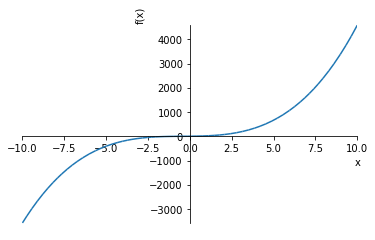

In [10]:
sp.plot(f)

In [11]:
from sympy.abc import x
from sympy.abc import y

In [12]:
from numpy import random

In [13]:
a = random.randint(1,10,1)
b = random.randint(1,10,1)
c = random.randint(1,10,1)
y = a*x**2 + b*x + c

In [14]:
x = sp.symbols('x')
y = sp.symbols('y')

for i in range(1,6):
    a = random.randint(1,10,1)
    b = random.randint(1,10,1)
    c = random.randint(1,10,1)
    y = a*x**2 + b*x + c
    print(y)

[4*x**2 + 3*x + 5]
[9*x**2 + 6*x + 1]
[8*x**2 + 2*x + 8]
[6*x**2 + 7*x + 7]
[4*x**2 + 2*x + 8]


## try

In [15]:
y

array([4*x**2 + 2*x + 8], dtype=object)

In [16]:
x = sp.symbols('x')
y = sp.symbols('y')
H = []
for i in range(1,5):
    a = random.randint(1,10,1)
    b = random.randint(1,10,1)
    c = random.randint(1,10,1)
    h = a*x**2 + b*x + c
    H.append(h)

In [17]:
H

[array([3*x**2 + 4*x + 3], dtype=object),
 array([x**2 + x + 2], dtype=object),
 array([2*x**2 + 6*x + 4], dtype=object),
 array([9*x**2 + x + 3], dtype=object)]

In [18]:
list(H)

[array([3*x**2 + 4*x + 3], dtype=object),
 array([x**2 + x + 2], dtype=object),
 array([2*x**2 + 6*x + 4], dtype=object),
 array([9*x**2 + x + 3], dtype=object)]

In [19]:
H[1]

array([x**2 + x + 2], dtype=object)

In [20]:
H[1]*2

array([2*x**2 + 2*x + 4], dtype=object)

In [21]:
h2 = H[2] 

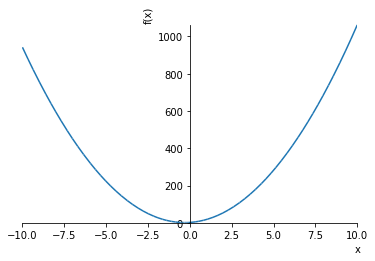

In [22]:
sp.plot(10*x**2 + 6*x + 2)

# (二)選出特定的區間

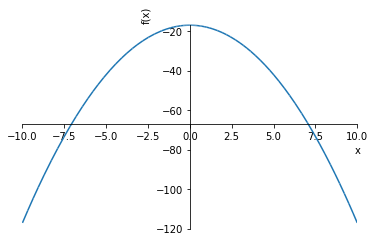

In [23]:
P = -x**2 - 3*a + 10
sp.plot(P)

In [24]:
from numpy import linspace

In [25]:
x = linspace(-10,10,1000)
y = -x**2 - 3*x + 10

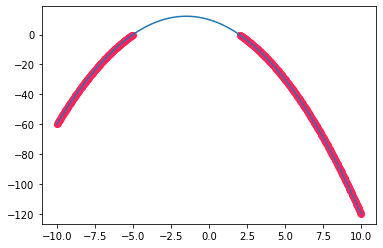

In [26]:
plt.scatter(x[y<0],y[y<0], c='#FF235A')
plt.plot(x,y)

# (三)迴歸預測練習

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.model_selection import train_test_split

### 輸入資料x

In [29]:
x = np.random.randn(50)

In [30]:
noise = 0.7*np.random.randn(50) - 0.3

### 真的答案y

In [31]:
y = 1.6*x + 0.75 + noise

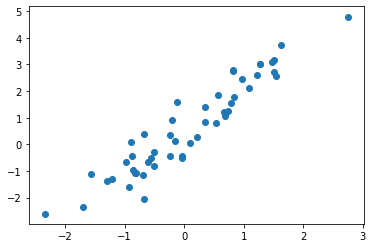

In [32]:
plt.scatter(x,y)

In [33]:
regr = LinearRegression()

In [34]:
X = x.reshape(50,1)

### 機器學習

In [35]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
Y = regr.predict(X)

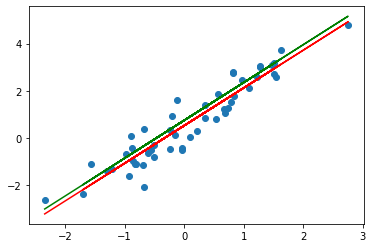

In [37]:
plt.scatter(x,y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.6*x + 0.75, 'g')

# (四)加權平均與排序

In [38]:
A = np.random.randint(40,100,50)
A

array([95, 62, 69, 42, 46, 48, 88, 83, 81, 66, 73, 87, 68, 61, 94, 42, 76,
       59, 45, 99, 92, 46, 44, 83, 80, 71, 75, 63, 71, 71, 51, 84, 96, 46,
       53, 83, 63, 95, 74, 48, 59, 78, 87, 91, 63, 98, 99, 91, 85, 60])

In [39]:
A = A.reshape(10,5)

In [40]:
weight = [0.15, 0.15, 0.2, 0.2, 0.3]
W = np.array(weight)
W = W.reshape(5,1)

In [41]:
A @ W

array([[59.55],
       [73.  ],
       [78.  ],
       [68.2 ],
       [70.1 ],
       [70.  ],
       [64.55],
       [70.1 ],
       [75.05],
       [82.75]])

In [46]:
G = A @ W
len(G[G>60])

9

In [62]:
G = G.reshape(10,1)

In [76]:
name = ['小明','小花','葳葳','姍姍','艾利','莉比','約翰','喬治','迪西','志明']

In [95]:
df0 = pd.DataFrame(name, columns = list("N"))
df1= pd.DataFrame(G , columns = list("G"))
df = pd.concat([df0.reset_index(drop = True), df1.reset_index(drop = True)], axis=1)
df.index = range(1,11)
df

,N,G
1,小明,59.55
2,小花,73.00
3,葳葳,78.00
4,姍姍,68.20
5,艾利,70.10
6,莉比,70.00
7,約翰,64.55
8,喬治,70.10
9,迪西,75.05
10,志明,82.75


In [99]:
df.sort_values(by = "G",ascending = False, inplace = True)
df

,N,G
10,志明,82.75
3,葳葳,78.00
9,迪西,75.05
2,小花,73.00
5,艾利,70.10
8,喬治,70.10
6,莉比,70.00
4,姍姍,68.20
7,約翰,64.55
1,小明,59.55
